$
\newcommand{\fat}[1]{\mathbf{#1}} % Bold for anything else
%\newcommand{\bldgr}[1]{{\mbox{\boldmath {${#1}$}}}} % Bold forlower-case Greek letters
\newcommand{\bldgr}[1]{\boldsymbol{#1}} % Bold forlower-case Greek letters
\newcommand{\transp}{^T} % Transpose
\newcommand{\htransp}{^H} % Hermitian transpose
\newcommand{\ud}{\,\mathrm{d}}
$

# Image Smoothing and Interpolation

## Linear regression


Let $\fat{x} = (x_1, \ldots, x_D )\transp$ denote the spatial position in a $D$-dimensional space. In medical imaging, $D$ is typically 2 or 3. 
Given $N$ measurements $\{t_n\}_{n=1}^N$ at locations $\{\fat{x}_n\}_{n=1}^N$, a frequent task is to predict the value $t$ at a new location $\fat{x}$.
A simple model, known as \emph{linear regression}, uses the function value
$$
y( \fat{x}; \fat{w} ) = w_0 + w_1 x_1 + \ldots + w_D x_D
$$
as its prediction, where 
$w_0, \ldots, w_D$
are tunable weights that need to be estimatated from the available measurements.
A more general form uses nonlinear functions of the input locations instead:
$$
y( \fat{x}; \fat{w} ) = w_0 + \sum_{m=1}^{M-1} w_m \phi_m( \fat{x} )
,
$$
which greatly increases the flexibility of the model.
Here the functions $\phi_m(\fat{x})$ are known as \emph{basis functions}, and it is often convenient to define an additional ``dummy'' basis function 
$\phi_0(\fat{x})=1$, so that the model can be written as
\begin{equation}
y( \fat{x}; \fat{w} ) = \sum_{m=0}^{M-1} w_m \phi_m( \fat{x} ),
\label{eq:prediction}
\end{equation}
where $\fat{w} = (w_0, \ldots, w_{M-1})\transp$ are $M$ tunable parameters.

In order to find suitable values of the parameters of the model, the following energy can be minimzed with respect to $\fat{w}$:
$$
E( \fat{w} ) = \sum_{n=1}^N 
               \left( t_n - \sum_{m=0}^{M-1} w_m \phi_m(\fat{x}_n) \right)^2
,               
$$
which simply sums of the squared distances between the measurements $t_n$ and the model's predictions $y(\fat{x}_n; \fat{w})$.

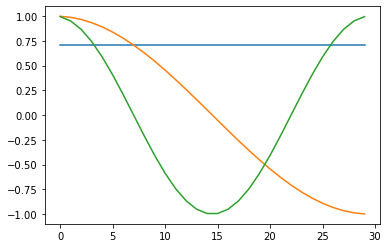

In [4]:
#
import numpy as np
from matplotlib import pyplot as plt
plt.ion()

#
N = 30;
ns = np.arange( N ).reshape( -1, 1 )
A = np.cos( np.pi * ( ns + 0.5 ) * np.arange( 3 ) / N  )
A[ :, 0 ] *= 1/np.sqrt(2)  # DC component is scaled differently
plt.figure()
plt.plot( ns, A )